In [77]:
import pandas as pd
from clean_data import load_all_houses_with_device
import matplotlib.pyplot as plt
import numpy as np

In [318]:
path = r"C:\Users\aar245\Desktop\privacy_preserving_nn\input\1min_real_may_june_july2019.csv"

In [319]:
df_full = pd.read_csv(path)

In [320]:
len(df_full)

9492197

In [314]:
df_full.loc[df_full.dataid==10621].dropna(axis=1)

,dataid,localminute,grid,solar,solar2,leg1v,leg2v
4074829,10621,2019-12-01 00:00:00,0.127,0.022,0.005,117.343,117.366
4074830,10621,2019-12-01 00:01:00,0.127,0.022,0.005,117.655,117.680
4074831,10621,2019-12-01 00:02:00,0.127,0.022,0.005,117.802,117.826
4074832,10621,2019-12-01 00:03:00,0.127,0.022,0.005,117.705,117.729
4074833,10621,2019-12-01 00:04:00,0.127,0.022,0.005,117.747,117.771
...,...,...,...,...,...,...,...
4099004,10621,2019-12-21 21:55:00,0.103,0.021,0.004,116.802,116.820
4099005,10621,2019-12-21 21:56:00,0.102,0.021,0.004,116.526,116.543
4099006,10621,2019-12-21 21:57:00,0.944,0.021,0.004,116.559,116.580
4099007,10621,2019-12-21 21:58:00,3.461,0.021,0.004,115.907,115.934


In [258]:
df_partial = df_full[['dataid', 'clotheswasher1']]

In [259]:
df_partial = df_partial.dropna()

In [260]:
df_partial.clotheswasher1 = df_partial.clotheswasher1*1000

In [261]:
df_partial

,dataid,clotheswasher1
89280,145,17.0
89281,145,17.0
89282,145,17.0
89283,145,17.0
89284,145,17.0
...,...,...
9312312,10182,11.0
9312313,10182,11.0
9312314,10182,11.0
9312315,10182,11.0


In [262]:
df_ids = df_partial.dataid.unique()

In [263]:
df_ids

array([  145,   387,   558,   690,   914,   950,  1240,  1417,  2318,
        2358,  2448,  3000,  3383,  3488,  3996,  4283,  4414,  5587,
        5982,  5997,  6172,  6464,  6672,  6907,  7069,  7999,  8327,
        9002,  9053,  9290,   984,  2164,  4735,  8849,  9081,   183,
         526,  1706,  6240,  6564,  7935,  9973, 10182], dtype=int64)

[16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0] 145
[4.0, 7.0, 8.0, 10.0, 11.0, 13.0, 14.0, 15.0, 16.0, 17.0] 387
[12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0] 558
[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0] 690
[7.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 21.0, 22.0] 914
[15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 24.0, 25.0, 27.0] 950
[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] 1240
[0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] 1417
[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 15.0, 16.0, 23.0] 2318
[7.0, 8.0, 17.0, 18.0, 19.0, 20.0, 22.0, 23.0, 24.0, 25.0] 2358
[9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 20.0] 2448
[3.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0] 3000
[5.0, 8.0, 13.0, 16.0, 19.0, 22.0, 25.0, 26.0, 27.0, 28.0] 3383
[15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0] 3488
[9.0, 10.0, 12.0, 13.0, 16.0, 18.0, 19.0, 20.0, 21.0, 22.0] 3996
[0.0, 1.0, 9.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0] 428

C:\Users\aar245\AppData\Local\Temp\61/ipykernel_1844372/38718180.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


[17.0, 18.0, 19.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 6672
[0.0, 4.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0] 6907
[0.0, 9.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0] 7069
[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0] 7999
[19.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0] 8327
[8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0] 9002
[0.0, 2.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 14.0] 9053
[13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0] 9290
[1.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0] 984
[12.0, 13.0, 14.0, 16.0, 18.0, 20.0, 21.0, 25.0, 26.0, 27.0] 2164
[7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0] 4735
[3.0, 4.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0] 8849
[16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 25.0, 27.0] 9081
[4.0, 10.0, 11.0, 12.0, 13.0, 29.0, 33.0, 34.0, 42.0, 43.0] 183
[29.0, 30.0, 31.0, 32.0, 33.0, 39.0, 42.0, 43.0, 45.0, 46.0] 526
[3.0, 7.0, 8.0, 10.0, 12.0, 13.0, 14.0, 15.0,

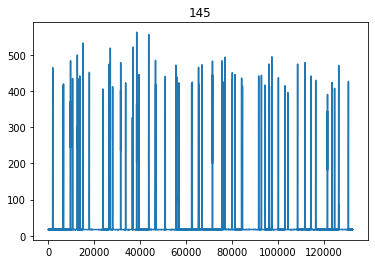

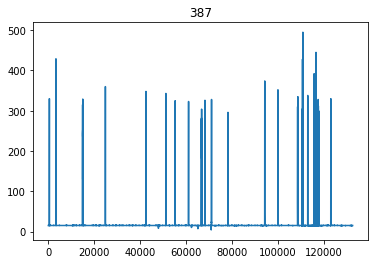

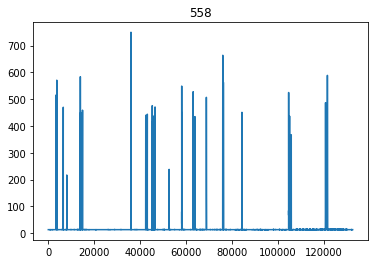

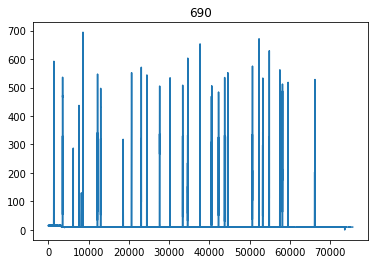

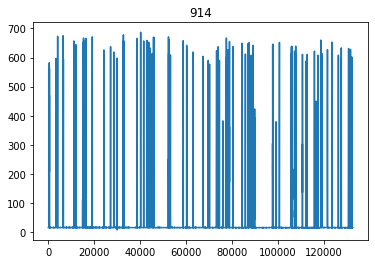

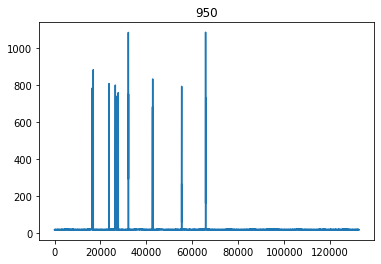

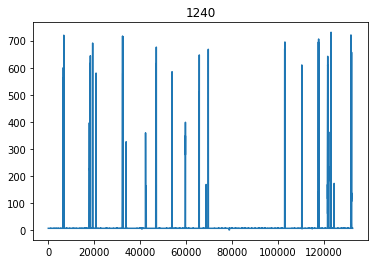

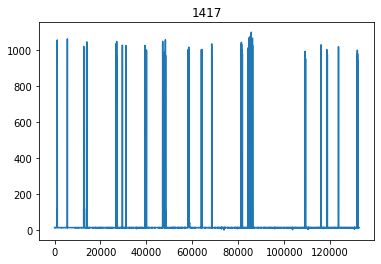

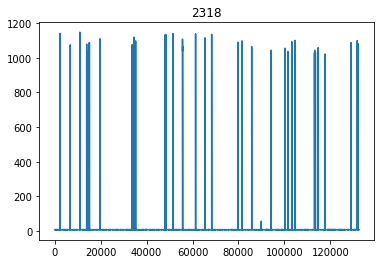

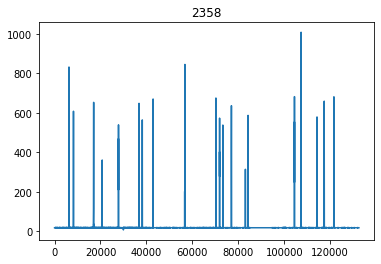

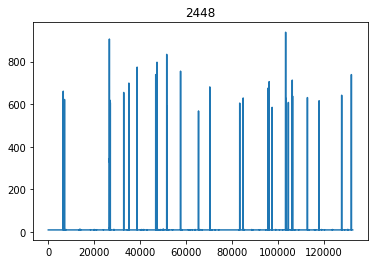

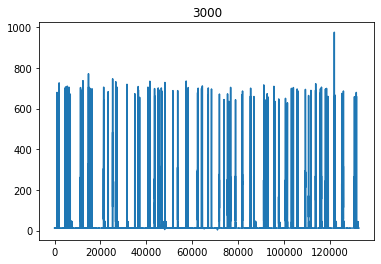

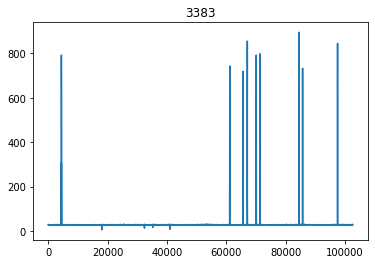

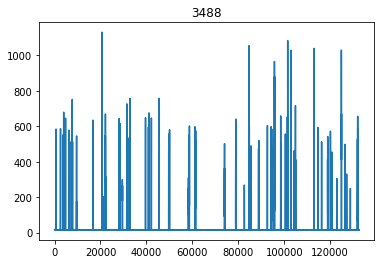

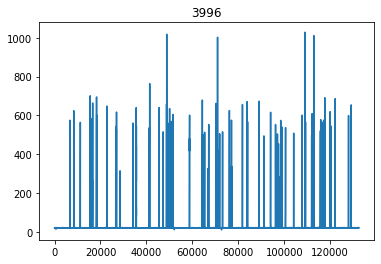

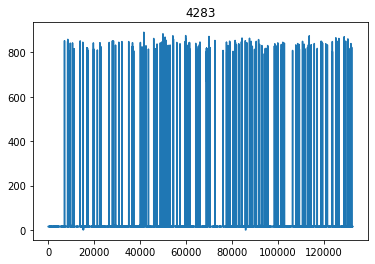

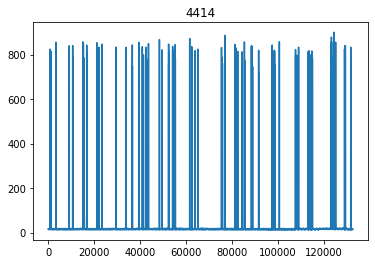

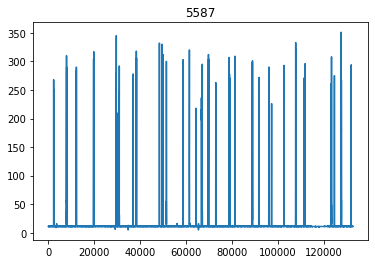

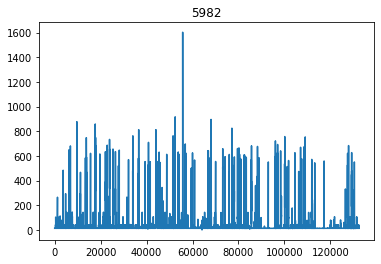

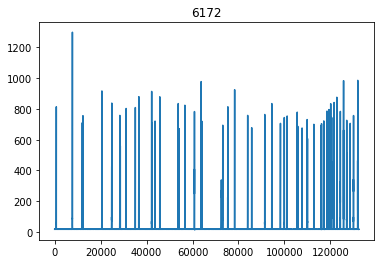

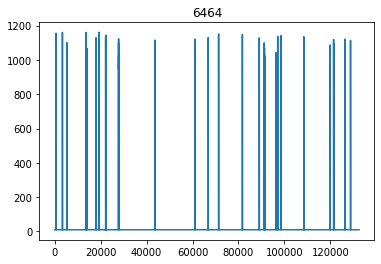

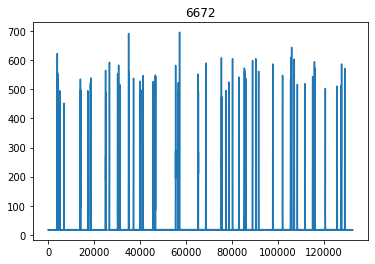

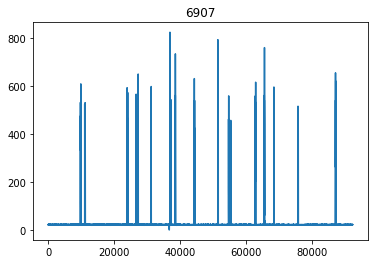

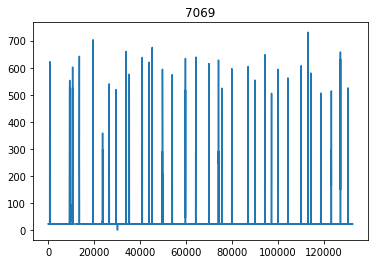

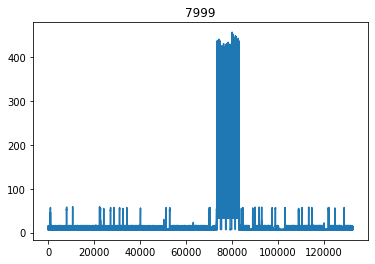

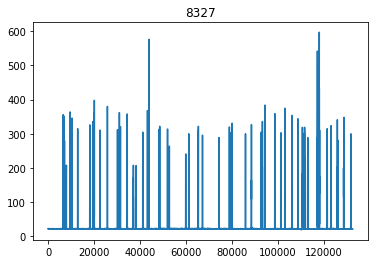

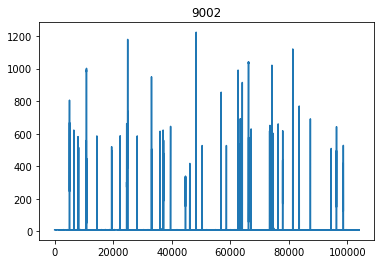

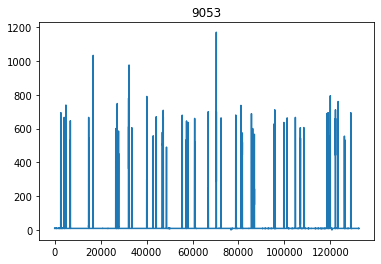

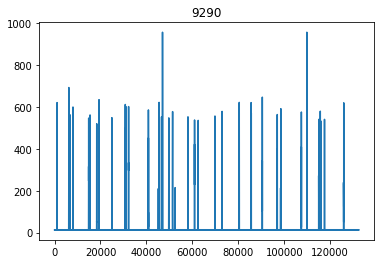

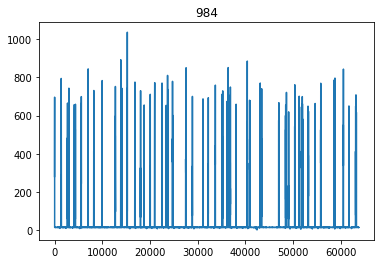

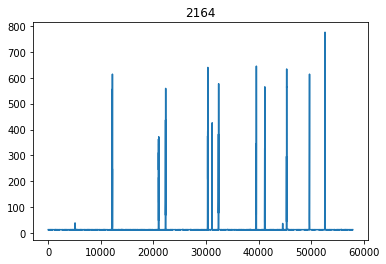

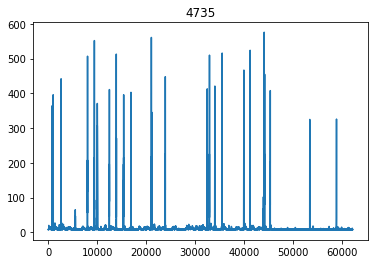

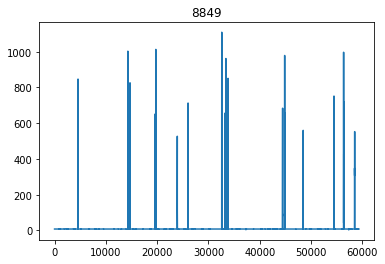

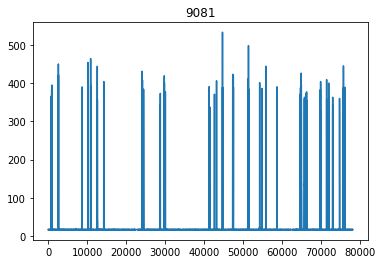

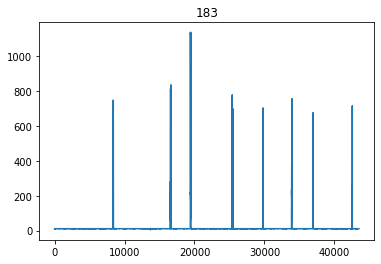

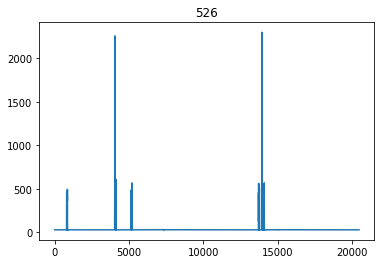

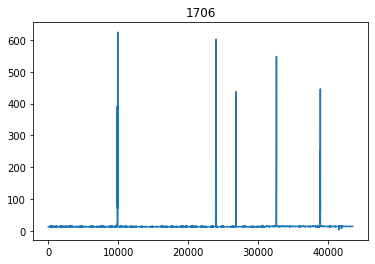

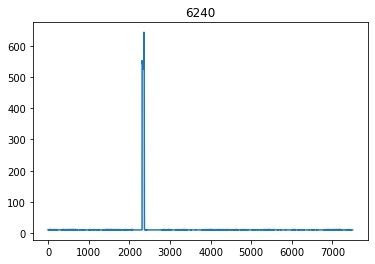

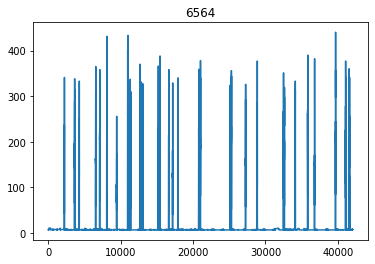

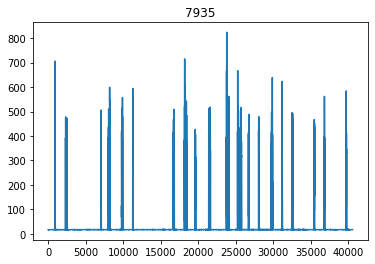

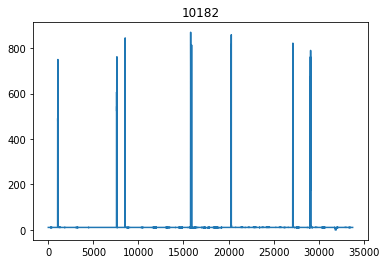

In [266]:
for house in df_ids:
    if house != 5997 and house != 9973:
        house_interest = df_partial.loc[df_partial.dataid==house]
        idx = np.argpartition(house_interest.clotheswasher1.unique(), 10)
        lowest_10 = list(house_interest.clotheswasher1.unique()[idx[:10]])
        lowest_10.sort()
        print(lowest_10, house)
        plt.figure()
        plt.title(str(house))
        plt.plot(house_interest.clotheswasher1.values)

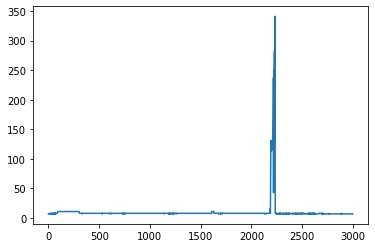

In [286]:
plt.plot(df_partial.loc[df_partial.dataid==6564].clotheswasher1.values[0:3000])

In [123]:
max(df_partial.loc[df_partial.dataid==2164].drye1.values)

20.0

In [23]:
df_partial = df_partial.loc[df_partial.dataid==183]

In [30]:
max(df_partial.drye1)*1000 - min(df_partial.drye1)*1000

3914.0

In [8]:
df = load_all_houses_with_device(path, 'drye1')

In [12]:
len(df.dataid.unique())

55